 
####ADDIS ABABA SCIENCE AND TECHNOLOGY UNIVERSITY
####College of Electrical and Mechanical Engineering
####Departments of Electrical and Computer Engineering
######      PG program
######Advanced Image and Video Processing 
######        Project

######Python code implementetion for "AN MR BRAIN IMAGES CLASSIFIER VIA PRINCIPAL COMPONENT ANALYSIS AND KERNEL SUPPORT VECTOR MACHINE"


Done By: Getachew Getu 
         (FTP0557/10)

Submitted to: Ashenafi Y (Ph.D.)

Date: February 2023 
           





# **Step1: Data collection**

###Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import pywt
import os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline

### Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the dataset
train_path = os.listdir('/content/drive/MyDrive/MR_image/Training/')
classes = {'normal':0, 'Malignant':1, 'Benign':2}

#**Step2: Preprocessing**

In [4]:
#resizing them to a dimension of 200x200 
#appending them to two lists X (image) and Y (class)

import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/MR_image/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

### Visualize data

In [5]:
##converting X and Y into NumPy arrays
#reshaping the X array by setting the dimension
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
np.unique(Y)

array([0, 1, 2])

In [6]:
pd.Series(Y).value_counts()

1    13
2    11
0     5
dtype: int64

In [7]:
X.shape, X_updated.shape

((29, 200, 200), (29, 40000))

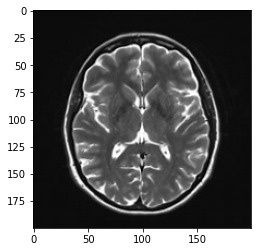

In [8]:
plt.imshow(X[0], cmap='gray')

### Preparing data

In [9]:
#reshaping the array X into 2D array with len(X) rows and an unspecified number of columns 

X_updated = X.reshape(len(X), -1)
X_updated.shape

(29, 40000)

In [10]:
# Perform 2D discret wavelet on each image
import pywt
X_dwt = []
for i in range(len(X)):
    coeffs = pywt.dwt2(X[i], 'haar')
    LL, (LH, HL, HH) = coeffs
    X_dwt.append(np.concatenate((LL.flatten(), LH.flatten(), HL.flatten(), HH.flatten())))

X_dwt = np.array(X_dwt)

# **Step3: Train Test Split**

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_dwt, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((23, 40000), (6, 40000))

###Feature Scaling 


In [13]:
#scaling the feature to avoid overfitting
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

510.00000000000006 -239.5
510.00000000000006 -181.50000000000003
1.0 0.0
1.0 0.0


Feature Reduction using PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)
Principal_component_analysis = PCA(.90)
pca_train = Principal_component_analysis.fit_transform(xtrain)
pca_test = Principal_component_analysis.transform(xtest)
#pca_train = xtrain
#pca_test = xtest

(23, 40000) (6, 40000)


In [16]:
print(pca_train.shape, pca_test.shape)
print(Principal_component_analysis.n_components_)
print(Principal_component_analysis.n_features_)

(23, 16) (6, 16)
16
40000


#**Step4: Model Building and Performance Evaluation**

####**A. Logistic Regresion**

In [17]:
#create the logestic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1)
lr.fit(xtrain, ytrain)

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print("Training Score:", lr.score(xtrain, ytrain))
print("Testing Score:", lr.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.5


####**B. Linear SVM model**

In [19]:
#create the SVM model using Linear model
L_model = svm.SVC( ) 
L_model.fit(pca_train, ytrain)

SVC()

In [20]:
print("Training Score:", L_model.score(pca_train, ytrain))
print("Testing Score:", L_model.score(pca_test, ytest))

Training Score: 0.8695652173913043
Testing Score: 0.3333333333333333


####**C. Honognious Polynomial Kernel SVM (HPOL)**

In [21]:
#create the SVM model using HPOL kernel 
from sklearn.svm import SVC
HPOL = SVC(kernel = 'poly', degree = 4) 
HPOL.fit(pca_train, ytrain)

SVC(degree=4, kernel='poly')

In [22]:
print("Training Score:", HPOL.score(pca_train, ytrain))
print("Testing Score:", HPOL.score(pca_test, ytest))

Training Score: 0.8260869565217391
Testing Score: 0.3333333333333333


####**D. Inhomoginious Polynomial Kernel SVM (IPOL)**

In [23]:
#IPOL kernel SVM model training
IPOL_model = svm.SVC(kernel='poly', degree = 4, gamma =0.01,  coef0 = 1.0, tol = 0.001)
IPOL_model.fit(pca_train, ytrain)

SVC(coef0=1.0, degree=4, gamma=0.01, kernel='poly')

In [24]:
print("Training Score:", IPOL_model.score(pca_train, ytrain))
print("Testing Score:", IPOL_model.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.8333333333333334


####**E. Gausian Basic Function Kernel (RBF)**

In [25]:
#RBF model training
from sklearn.svm import SVC
RBF_model = SVC(kernel='rbf', gamma =0.01, degree = 4 )
RBF_model.fit(pca_train, ytrain)

SVC(degree=4, gamma=0.01)

In [26]:
print("Training Score:", RBF_model.score(pca_train, ytrain))
print("Testing Score:", RBF_model.score(pca_test, ytest))

Training Score: 0.9565217391304348
Testing Score: 0.6666666666666666


In [27]:
#Evaluating Performance on different types of models
model = { "log_regr":LogisticRegression(C=0.1),
         "HPoL":SVC(kernel = 'poly', degree = 4),
        "IPoL":SVC(kernel='poly', degree = 4, gamma =0.01,  coef0 = 1.0, tol = 0.001),    
         "GRB":SVC(kernel = 'rbf', gamma=0.01,degree = 4),
         "Linear":SVC()
          
}

results = {}
for algo in model:
    clf = model[algo]
    clf.fit(pca_train,ytrain)
    score = clf.score(pca_test,ytest)
   # print ("%s : %s " %(algo, score))
    results[algo] = score
print (results)

{'log_regr': 0.6666666666666666, 'HPoL': 0.3333333333333333, 'IPoL': 0.8333333333333334, 'GRB': 0.6666666666666666, 'Linear': 0.3333333333333333}


In [28]:
#the best model are 
X_pred = IPOL_model.predict(pca_test)
misclassified=np.where(ytest!=X_pred)
misclassified

(array([2]),)

# **Step 5: Testing data and Classfication**

In [29]:
dec = {0:'Malignant',1:'normal', 2:'Benign'}

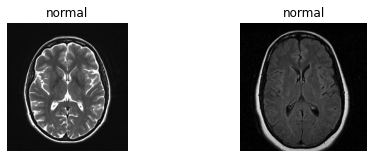

In [30]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/MR_image/Testing')
c=1
file_pat = '/content/drive/MyDrive/MR_image/Testing/normal/'
for i in os.listdir('/content/drive/MyDrive/MR_image/Testing/normal/')[:2]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(file_pat+i,0)
    img1 = cv2.resize(img, (4,4))
    img1 = img1.reshape(1,-1)/255
    p = IPOL_model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1